
1. But de l'exercice : Votre objectif est de créer un simple réseau de neurones convolutifs (CNN) pour la classification d'images. Pour cet exercice, vous pouvez utiliser l'ensemble de données CIFAR-10 qui est une collection d'images de 10 classes différentes.
2. Tâches :
    - Faites un train de ce model sur GPU
    - Modifier le CNN en ajoutant des couches suplémentaires
    - Crée une séquence Conv2d --> BatchNorm2d --> ReLU
    - Réalisez plusieurs entraînements avec des couches et des paramètres différents, puis comparez les résultats en utilisant `from sklearn.metrics import classification_report`.

## Bonus

### GoogLeNet: Un Aperçu Historique
GoogLeNet est un modèle de réseau neuronal convolutif profond qui a été proposé par des chercheurs de Google, d'où son nom. Le modèle a été introduit pour la première fois en 2014 dans le papier de recherche intitulé "[Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)", et a remporté le défi de la classification visuelle d'ImageNet (ILSVRC) cette même année.
Le modèle est plus particulièrement célèbre pour deux de ses caractéristiques uniques :


### Inception Module :
L'Inception Module est une micro-architecture novatrice (ou un "bloc de construction") pour les CNN. Il est basé sur une philosophie intelligente de conception de réseau qui interroge "à quoi ressemblerait une bonne solution locale" pour la conception de réseau.

Le Module Inception a introduit l'idée d'avoir plusieurs opérations de convolution de différentes tailles (1x1, 3x3, 5x5) en parallèle dans un même niveau de l'architecture, permettant au CNN d'apprendre des caractéristiques à différentes échelles. Cela a également amené à une plus grande efficacité en termes de calcul.

![inception](../asset/inception.png)

### Profondeur du réseau :
GoogLeNet a été l'un des premiers réseaux neuronaux profonds avec 22 couches de profondeur. En utilisant l'Inception Module et une grande profondeur, GoogLeNet a pu atteindre des performances élevées sur diverses tâches de vision par ordinateur, y compris la classification des images.
Il convient de noter que même si GoogLeNet a lancé l'idée originale du Module Inception, de nombreuses variantes et améliorations ont été introduites depuis, telles que Inception-v2, Inception-v3 et Inception-v4, chacune améliorant les performances et l'efficacité de la précédente.

![googlenet architecture](../asset/googlenet_architecture.png)

Pour l'anecdote, ce modèle compte 25 millions de paramètres, en 2014 il était assser difficile pour l'utilisateur classique de le train  Maintenant, un LLM classique comme Mistral comporte 7 milliards de paramètres, ou comme ChatGPT-3.5 qui en compte 175 milliards !!!

## Objectif

Réalisez une version miniature de la couche Inception, puis ajoutez-la à votre réseau actuel.

![mini](../asset/inception_mini.png)

In [4]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.nn.functional import relu

batch_size = 4

# Load and normalize the CIFAR10 training and test datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

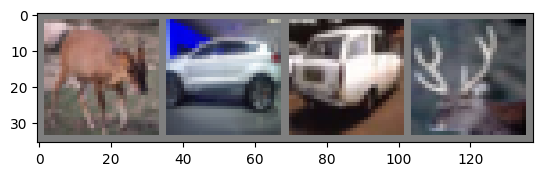

deer  automobile automobile deer 
Shape torch.Size([4, 3, 32, 32])


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Batch, color chan, width, height
print("Shape", images.shape)

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
# Define a simple CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(relu(self.conv1(x)))
        
        x = self.pool(relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = relu(self.fc1(x))
        x = relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [9]:
# Define a simple CNN
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding="valid")
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding="valid")
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = relu(x)
        x = self.pool(x)

        print(x.shape)

        x = x.view(-1, 32 * 6 * 6)
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        x = relu(x)
        x = self.fc3(x)
        return x


In [32]:
# Create a Net
# net = Net()
net = Net2()
print(net.to(device))

Net2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (batchnorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [33]:

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
# adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net.to(device)

# Train the network
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([4, 32, 6, 6])
torch.Size([

KeyboardInterrupt: 

In [13]:
from sklearn.metrics import classification_report
from tqdm.auto import tqdm

# Set the model in evaluation mode
net.eval()

true_labels = []
predictions = []

# Disabling gradient calculation
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data

        # Send inputs to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(images)
        predicted = torch.argmax(outputs.data, 1)
        # Store results
        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Generate classification report
report = classification_report(true_labels, predictions)
print(report)

  0%|          | 0/2500 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.85      0.70      0.77      1000
           2       0.53      0.57      0.55      1000
           3       0.54      0.41      0.46      1000
           4       0.64      0.59      0.61      1000
           5       0.52      0.65      0.58      1000
           6       0.73      0.77      0.75      1000
           7       0.71      0.72      0.72      1000
           8       0.77      0.81      0.79      1000
           9       0.71      0.80      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



# Inception

In [45]:
class ConvModule(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(ConvModule, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        # Mettre le batchnorm après le relu est intéréssant dans les grand réseaux

    def forward(self, x):
        # Conv module
        conv_module = self.conv(x)
        conv_module = self.relu(conv_module)
        conv_module = self.batchnorm(conv_module)

        return conv_module

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_channels_conv1, out_channels_conv2, stride, padding):
        super(InceptionModule, self).__init__()
        self.conv_mod1 = ConvModule(in_channels=in_channels, out_channels=out_channels_conv1, kernel_size=1, stride=stride, padding=padding)
        self.conv_mod2 = ConvModule(in_channels=in_channels, out_channels=out_channels_conv2, kernel_size=3, stride=stride, padding=padding)

    def forward(self, x):
        # Conv modules
        conv_module1 = self.conv_mod1(x)
        conv_module2 = self.conv_mod2(x)

        # Concatenate
        out = torch.cat((conv_module1, conv_module2), 1)

        return out

class DownsampleModule(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownsampleModule, self).__init__()
        self.conv_mod1 = ConvModule(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=2, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        # Conv module
        conv_module1 = self.conv_mod1(x)

        # Pooling
        pool = self.pool(x)

        # Concatenate
        out = torch.cat((conv_module1, pool), 1)

        return out

# CNN with Inception module
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding="same")
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.inception1 = InceptionModule(in_channels=16, out_channels=16, stride=1, padding="same")

        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = relu(x)
        x = self.pool(x)

        x = self.inception1(x)

        #print(x.shape)

        x = x.view(-1, 32 * 16 * 16)
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        x = relu(x)
        x = self.fc3(x)
        return x

class SmallInceptionNet(nn.Module):
    def __init__(self):
        super(SmallInceptionNet, self).__init__()
        # Image en entrée : 3x28x28

        self.conv_mod1 = ConvModule(in_channels=3, out_channels=96, kernel_size=3, stride=1, padding="same")

        self.inception1 = InceptionModule(in_channels=96, out_channels_conv1=32, out_channels_conv2=32, stride=1, padding="same")
        self.inception2 = InceptionModule(in_channels=64, out_channels_conv1=32, out_channels_conv2=48, stride=1, padding="same")
        self.downsample1 = DownsampleModule(in_channels=80, out_channels=80)

        self.inception3 = InceptionModule(in_channels=160, out_channels_conv1=112, out_channels_conv2=48, stride=1, padding="same")
        self.inception4 = InceptionModule(in_channels=160, out_channels_conv1=96, out_channels_conv2=64, stride=1, padding="same")
        self.inception5 = InceptionModule(in_channels=160, out_channels_conv1=80, out_channels_conv2=80, stride=1, padding="same")
        self.inception6 = InceptionModule(in_channels=160, out_channels_conv1=48, out_channels_conv2=96, stride=1, padding="same")
        self.downsample2 = DownsampleModule(in_channels=144, out_channels=96)

        self.inception7 = InceptionModule(in_channels=240, out_channels_conv1=176, out_channels_conv2=160, stride=1, padding="same")
        self.inception8 = InceptionModule(in_channels=336, out_channels_conv1=176, out_channels_conv2=160, stride=1, padding="same")
        self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)

        self.fc1 = nn.Linear(336, 10)

    
    def forward(self, x):
        # Image en entrée : 3x28x28
        x = self.conv_mod1(x)

        x = self.inception1(x)
        x = self.inception2(x)
        x = self.downsample1(x)

        x = self.inception3(x)
        x = self.inception4(x)
        x = self.inception5(x)
        x = self.inception6(x)
        x = self.downsample2(x)

        x = self.inception7(x)
        x = self.inception8(x)
        x = self.avgpool(x)

        x = x.view(-1, 336)
        x = self.fc1(x)

        return x

## Application du inception module dans mon cnn

In [2]:
# Create a Net
net = Net3()

net.to(device)

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
# adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

NameError: name 'Net3' is not defined

In [17]:
conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=1, stride=1, padding="same")
conv2 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding="same")

res1 = conv1(images)
res2 = conv2(images)

print(res1.shape)
print(res2.shape)
print(torch.cat((res1, res2), dim=1).shape)

torch.Size([4, 6, 32, 32])
torch.Size([4, 8, 32, 32])
torch.Size([4, 14, 32, 32])


In [47]:
from sklearn.metrics import classification_report
from tqdm.auto import tqdm

# Set the model in evaluation mode
net.eval()

true_labels = []
predictions = []

# Disabling gradient calculation
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data

        # Send inputs to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(images)
        predicted = torch.argmax(outputs.data, 1)
        # Store results
        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Generate classification report
report = classification_report(true_labels, predictions)
print(report)

  0%|          | 0/2500 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      1000
           1       0.80      0.72      0.76      1000
           2       0.52      0.49      0.50      1000
           3       0.41      0.54      0.46      1000
           4       0.56      0.62      0.58      1000
           5       0.57      0.46      0.51      1000
           6       0.61      0.79      0.69      1000
           7       0.77      0.62      0.69      1000
           8       0.82      0.70      0.76      1000
           9       0.72      0.72      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.64     10000
weighted avg       0.65      0.63      0.64     10000



## Application d'un petit réseau inception (google net)

In [81]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/cifar10_experiment_1')

In [82]:
batch_size = 64

# Load and normalize the CIFAR10 training and test datasets
# resize to 28x28
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((28, 28)),
                                transforms.RandomRotation(10),
                                transforms.RandomHorizontalFlip(),
                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


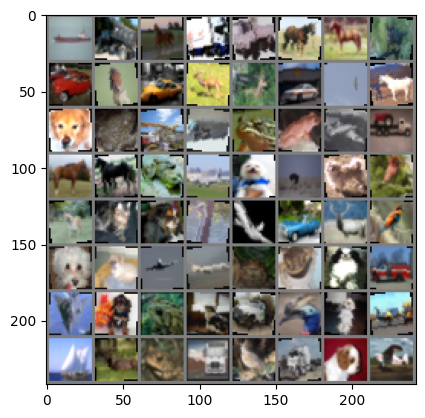

ship  truck horse truck truck horse horse cat   automobile bird  automobile deer  deer  automobile bird  horse dog   frog  airplane truck frog  frog  airplane truck horse horse frog  airplane dog   bird  dog   bird  dog   cat   dog   bird  airplane automobile deer  bird  dog   dog   airplane airplane frog  frog  dog   truck airplane dog   frog  cat   truck bird  dog   airplane ship  deer  frog  truck bird  truck dog   airplane
Shape torch.Size([64, 3, 28, 28])


In [83]:
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()

    # write to tensorboard
    writer.add_image('cifar10_images_28x28', npimg)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images)



# show images
imshow(img_grid)
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Batch, color chan, width, height
print("Shape", images.shape)

In [84]:
net = SmallInceptionNet()

net.to(device)

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
# adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [85]:
import wandb

run = wandb.init(
    # Set the project where this run will be logged
    project="my-awesome-project",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.001,
        "epochs": 10,
    },
)

loss,██▅▅▅▄▆▄▄▃▄▃▂▃▃▄▃▃▄▃▂▂▂▃▂▂▂▃▂▂▁▂▂▂▂▂▁▂▃▁
loss,0.36178


In [86]:
wandb.watch(net, log_freq=100)
wandb.log({"examples": [wandb.Image(im) for im in images]})

In [87]:
# Train the network
num_epoch = 10


for epoch in range(num_epoch):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            wandb.log({"loss": running_loss / 100})
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 1.795
[1,   200] loss: 1.530
[1,   300] loss: 1.383
[1,   400] loss: 1.294
[1,   500] loss: 1.204
[1,   600] loss: 1.134
[1,   700] loss: 1.090
[2,   100] loss: 0.986
[2,   200] loss: 0.988
[2,   300] loss: 0.922
[2,   400] loss: 0.894
[2,   500] loss: 0.880
[2,   600] loss: 0.837
[2,   700] loss: 0.836
[3,   100] loss: 0.772
[3,   200] loss: 0.736
[3,   300] loss: 0.756
[3,   400] loss: 0.704
[3,   500] loss: 0.722
[3,   600] loss: 0.691
[3,   700] loss: 0.719
[4,   100] loss: 0.642
[4,   200] loss: 0.615
[4,   300] loss: 0.637
[4,   400] loss: 0.628
[4,   500] loss: 0.647
[4,   600] loss: 0.597
[4,   700] loss: 0.600
[5,   100] loss: 0.558
[5,   200] loss: 0.539
[5,   300] loss: 0.559
[5,   400] loss: 0.568
[5,   500] loss: 0.567
[5,   600] loss: 0.559
[5,   700] loss: 0.518
[6,   100] loss: 0.494
[6,   200] loss: 0.505
[6,   300] loss: 0.471
[6,   400] loss: 0.508
[6,   500] loss: 0.497
[6,   600] loss: 0.515
[6,   700] loss: 0.489
[7,   100] loss: 0.456
[7,   200] 

In [107]:
def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    print("table", table)
    wandb.log({"predictions_table":table})

In [108]:
from sklearn.metrics import classification_report
from tqdm.auto import tqdm

# Set the model in evaluation mode
net.eval()

true_labels = []
predictions = []
# Disabling gradient calculation
with torch.no_grad():
    for i, data in enumerate(tqdm(testloader)):
        images, labels = data

        # Send inputs to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(images)
        predicted = torch.argmax(outputs.data, 1)
        # Store results
        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())
        
        # On log un batch d'images pour les visualiser dans wandb
        if i == 0:
            log_image_table(images, predicted, labels, torch.nn.functional.softmax(outputs, dim=1))

# Generate classification report
report = classification_report(true_labels, predictions)
print(report)

  0%|          | 0/157 [00:00<?, ?it/s]